In [107]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import Regression_poly

In [108]:
df = pd.read_csv("appartsParis.csv",header=0)
pd.set_option('display.max_rows',5) # pour afficher juste les 5 premiers lignes
df


,Nb_pieces,Nb_chambres,Etage,Surface (en m2),Arrondissement,Prix (en K�)
0,3,4,5,67,17,770.0
1,1,2,5,26,17,321.0
...,...,...,...,...,...,...
39,2,1,2,38,15,450.0
40,4,2,8,95,15,876.0


In [109]:
df.rename(columns={ 
                    "Nb_pieces":'nb_pieces',
                    "Nb_chambres":'nb_chambres',
                    "Etage":'etage',
                    "Surface (en m2)":'surface',
                    "Arrondissement":'arrondissement',
                    "Prix (en K�)":'prix'},
          inplace=True)
df

,nb_pieces,nb_chambres,etage,surface,arrondissement,prix
0,3,4,5,67,17,770.0
1,1,2,5,26,17,321.0
...,...,...,...,...,...,...
39,2,1,2,38,15,450.0
40,4,2,8,95,15,876.0


In [110]:
#Les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nb_pieces       41 non-null     int64  
 1   nb_chambres     41 non-null     int64  
 2   etage           41 non-null     int64  
 3   surface         41 non-null     int64  
 4   arrondissement  41 non-null     int64  
 5   prix            41 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 2.0 KB


In [111]:
#trouver, compter et afficher les valuers manquantes pour chaque colonnes
df.isnull().sum().sort_values(ascending=False)

nb_pieces         0
nb_chambres       0
                 ..
arrondissement    0
prix              0
Length: 6, dtype: int64

In [112]:
df.describe() 

,nb_pieces,nb_chambres,etage,surface,arrondissement,prix
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2.658537,2.756098,4.097561,55.121951,14.414634,638.306098
...,...,...,...,...,...,...
75%,3.000000,4.000000,5.000000,73.000000,17.000000,815.000000
max,5.000000,5.000000,10.000000,118.000000,19.000000,1595.000000


In [113]:
#Regroupe chaque colonne dans un array
nb_pieces=np.array(df['nb_pieces'])
nb_chambres=np.array(df['nb_chambres'])  #arrondissement=df['arrondissement'].tolist()
etage=np.array(df['etage'])
surface=np.array(df['surface'])
arrondissement=np.array(df['arrondissement'])
prix=np.array(df['prix'])



NoteArrondissement={"6":76,"12":73.3,"15":59.1,"16":76,"17":65.3,"19":59.8}


In [114]:
def fonctCaract(Arrond,etage,nb_pieces):
   # for j in range(6):
   #     if Arrond==NoteArrondissement[j][0]:
   #        noteArrond=NoteArrondissement[j][1]
    noteArrond=NoteArrondissement[Arrond]
    caracteristique=noteArrond/100 + (8-etage)/8  +nb_pieces/6
    return caracteristique
    

In [115]:
n=len(surface)
noteArrond=np.zeros(n)
caract=np.zeros(n)
prixAuMetre2=np.zeros(n)

for i in range(n):
    Arrond=str(arrondissement[i])
    caract[i]=fonctCaract(Arrond,etage[i],nb_pieces[i])
    prixAuMetre2[i]=(prix[i]/surface[i])
 


Text(0.5, 1.0, 'Nuage de points')

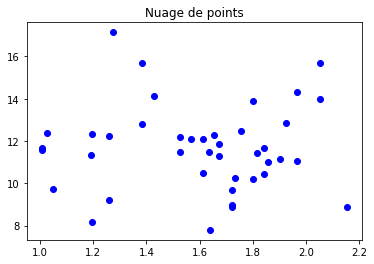

In [83]:

xi=caract
yi=prixAuMetre2
plt.scatter(xi,yi,c='b')
plt.title("Nuage de points")


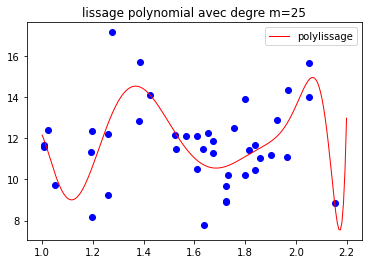

In [116]:
x_min=1.
x_max=2.2

m=25 # Reg d'order 5
w=Regression_poly.coeff_w_Regression(xi,yi,m)
x=np.linspace(x_min,x_max,200)
yp=Regression_poly.poly_Regression(w,x)


plt.plot(x,yp,'r',label='polylissage',linewidth=1)
plt.legend()
plt.scatter(xi,yi,c='b')
plt.title('lissage polynomial avec degre m=%i' %m)

plt.show() # affiche la figure a l'ecran

In [85]:
def EstimationDuPrix(Arrond,Surf,eta,nmpiece,prixVente):
    prixVenteM2=prixVente/Surf
    c = fonctCaract(Arrond,eta,nmpiece)
    pr_approM2 = Regression_poly.poly_Regression(w,c)
    prixVenteEstime = pr_approM2*surf*1000
    prixVenteEstime = np.fix(prixVenteEstime)
    print('le prix de l appartement est estimé à ', prixVenteEstime,'euro' )
    erreur=np.fix((prixVente*1000-prixVenteEstime)/(prixVente*10))
    print("erreur = ",erreur,'%')

In [49]:
class appartement :
    
        
    """ un appartement est caractérisé par :
    -arrondissement : la qualité du quartier
    -Sa superficie : surface 
    etage
    nmre pieces
    prix
    """
    def __init__(self,A,S,E,NP,PV):
        self.A=A
        self.S=S
        self.E=E
        self.NP=NP
        self.PV=PV
    
    def arrondissement(self):
        return self.A
    
    def superficie(self):
        return self.S
    
    def etage(self):
        return self.E
    
    def nbrepiece(self):
        return self.NP
    
    def prix(self):
        return self.PV
        
        
part1=appartement("17",19,5,1,242)
part2=appartement("19",80,6,5,795)
part3=appartement("6",30,2,1,355)
part4=appartement("12",57,4,3,570)
part5=appartement("12",36,4,2,435)
part6=appartement("12",228,4,2,2390)
part7=appartement("17",56,4,3,735)
part8=appartement("12",92,8,4,1060)

LesAppartements=[part1,part2,part3,part4,part5,part6,part7,part8]

numappart = 1 
for appart in LesAppartements:
    arrond=appart.arrondissement()
    surf=appart.superficie()
    eta=appart.etage()
    nmpiece=appart.nbrepiece()
    prixVente=appart.prix()
    
    print('---- Estimation du prix de : Appart%2s  -----------\n' %numappart)
    EstimationDuPrix(arrond,surf,eta,nmpiece,prixVente)
    PV = prixVente*1000
    print('\n Prix de vente demandé = %9.2f\n' %PV)
    print('-------------------------------------\n')
    numappart+=1

---- Estimation du prix de : Appart 1  -----------

le prix de l appartement est estimé à  199530.0 euro
erreur =  17.0 %

 Prix de vente demandé = 242000.00

-------------------------------------

---- Estimation du prix de : Appart 2  -----------

le prix de l appartement est estimé à  843683.0 euro
erreur =  -6.0 %

 Prix de vente demandé = 795000.00

-------------------------------------

---- Estimation du prix de : Appart 3  -----------

le prix de l appartement est estimé à  316494.0 euro
erreur =  10.0 %

 Prix de vente demandé = 355000.00

-------------------------------------

---- Estimation du prix de : Appart 4  -----------

le prix de l appartement est estimé à  608027.0 euro
erreur =  -6.0 %

 Prix de vente demandé = 570000.00

-------------------------------------

---- Estimation du prix de : Appart 5  -----------

le prix de l appartement est estimé à  414302.0 euro
erreur =  4.0 %

 Prix de vente demandé = 435000.00

-------------------------------------

---- Estima